<a id = 'Section 0'></a>
***
## HW1

#### Use this notebook to solve and report you solution to homework 1. This homwork has the following problems: 

- <a href = '#Section 1'> Problem 1  </a>
- <a href = '#Section 2'> Problem 2  </a>
- <a href = '#Section 3'> Problem 3  </a>
- <a href = '#Section 4'> Problem 4  </a>

### Submission guidelines:
- No report is required. 
- The results should be included in the notebook only. 
- Use the given code cell(s) to write your code for each problem.Don't add new cells 
- Use the given markup cell(s) to write your comments and answers, if required. 
- Put the notebook and all the images you use in <font color=red>**one compressed file**</font> and submit it through the assignment on Teams.
- Name the submitted file as <font color=red>**ID_FirstName_LastName**</font>. For example: 2100111_IYAD_JAFAR

***
## Import Packages

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
# import other packages if you need any
%matplotlib inline

<a id='Section 1'></a>
***
<a href='#Section 0'> Back to top </a>
## Problem 1. Image mosaic
***
Write the function gen_mosaic() that accepts a set of 9 color images and generates one image mosaic that combines the 9 images in 3x3 grid.    

In [6]:
# function declaration 
def gen_mosaic(images,size):
    rows=[]
    for i in range(0, len(images), size):
        rows.append(np.concatenate(images[i: i + size], axis=1))

        
    mosaic = np.concatenate(rows, axis=0)
    return mosaic




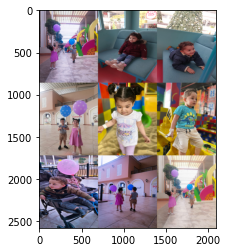

In [7]:
# Read images 
images=[]
for i in range(9):
    img=cv2.imread(f"img{i}.jpg",1)
    img=cv2.resize(img,dsize=(700,860))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(img)
   
# Call the function 

grid_img=gen_mosaic(images=images,size=3)

# Show the generated image using matplotlib 
plt.imshow(grid_img)


<a id='Section 2'></a>
***
<a href='#Section 0'> Back to top </a>
## Problem 2. Intensity and color manipulation
***
For the image ucid00027.tif:
1. Calculate the mean/min/max/standard deviation of the brightness/intensity of the image. 
2. Increase the saturation in the image by 20%. Show the original and new images. What is your observation? 
3. Modify the intensity value of the image using g = C\*log10(f) and show the new color image. Note that C is a constant that you need to calculate such that the intensity range after applying the log function is in the range [0,255]. What is your observation on the new image when compared to the original one.  

Intensity Std:  91.0 
Intensity Min:  0 
Intensity Max:  255 
Intensity Mean: 114.0


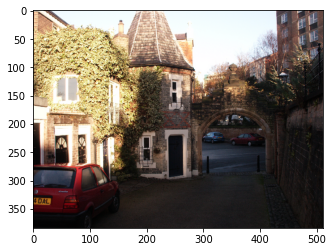

In [8]:
# 1. 
img=cv2.imread("ucid00027.tif",1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV) 

mean=np.round(np.mean(hsv[:,:,2]))
min=np.round(np.min(hsv[:,:,2]))
max=np.round(np.max(hsv[:,:,2]))
std=np.round(np.std(hsv[:,:,2]))
print("Intensity Std: ",std,"\nIntensity Min: ",min,"\nIntensity Max: ",max,"\nIntensity Mean:",mean)
plt.imshow(img)

Text(0.5, 1.0, 'Original')

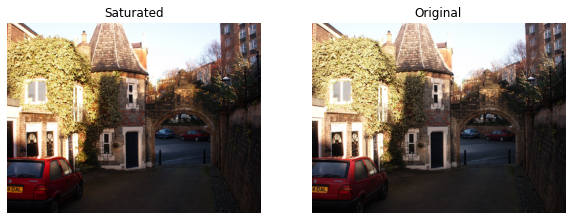

In [9]:
# 2.
hsvNew=hsv.copy()
hsvNew[:,:,1]=cv2.multiply(hsvNew[:,:,1],1.2)

hsvNew=cv2.cvtColor(hsvNew,cv2.COLOR_HSV2RGB)

plt.subplots(1,2,figsize=(10, 10))

plt.subplot(1,2,1)
plt.imshow(hsvNew)
plt.axis('off')
plt.title('Saturated')

plt.subplot(1,2,2)
plt.imshow(img)
plt.axis('off')
plt.title('Original')


#### Saturation gives the purity of a colour. A pure colour has no gray mixed in it. when the saturation increases the pixels become saturated with it's color and hence the image become more clear and also increase the lightness in the image(bright image).

C:\Users\user\AppData\Local\Temp\ipykernel_18104\2797404555.py:4: RuntimeWarning: divide by zero encountered in log
  hsvNew[:,:,2]=C*np.log(hsvNew[:,:,2])


min intinsity 0 max intinsity 255


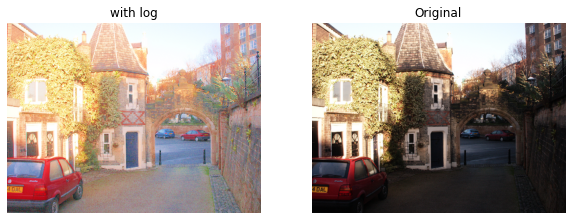

In [10]:
# 3.
hsvNew=hsv.copy()
C=(255-0)/(np.log(np.max(hsvNew[:,:,2])-np.min(hsvNew[:,:,2])))
hsvNew[:,:,2]=C*np.log(hsvNew[:,:,2])

hsvNew=cv2.cvtColor(hsvNew,cv2.COLOR_HSV2RGB)

plt.subplots(1,2,figsize=(10, 10))

plt.subplot(1,2,1)
plt.imshow(hsvNew)
plt.axis('off')
plt.title('with log')

plt.subplot(1,2,2)
plt.imshow(img)
plt.axis('off')
plt.title('Original')
print("min intinsity",np.min(hsvNew[:,:,2]),"max intinsity",np.max(hsvNew[:,:,2]))


#### The dynamic range of an image can be compressed by replacing each pixel value with its logarithm. This has the effect that low intensity pixel values are enhanced. and hence remove shadow regions from the image and become more clearer (show more details in the image)

#### Show how did you calculate the constant C. 
#### C=(255-0)/(np.log(np.max(hsvNew[:,:,2])-np.min(hsvNew[:,:,2])))




<a id='Section 3'></a>
***
<a href='#Section 0'> Back to top </a>
## Problem 3. Linear scaling
***
Given the images airport.tiff and clock.tiff. Modify the second image such that the range of its intensities is the same as the first image using linear scaling. Plot the histograms of the second image before and after processing on the same plot. 

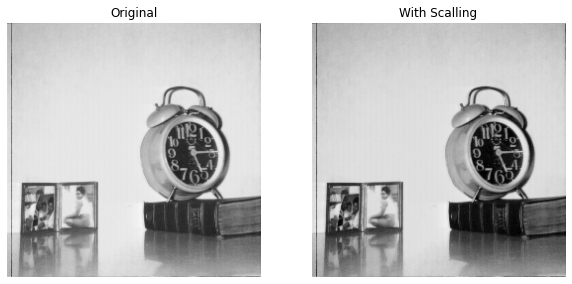

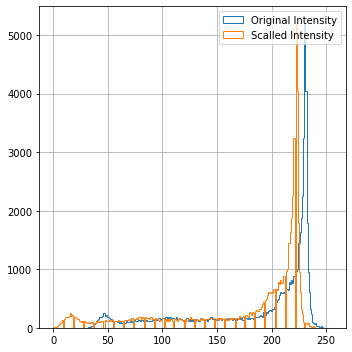

In [11]:
# read two images 
img1=cv2.imread("airport.tiff",1)
img2=cv2.imread("clock.tiff",1)

img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1_hsv=cv2.cvtColor(img1,cv2.COLOR_RGB2HSV)

img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2_hsv=cv2.cvtColor(img2,cv2.COLOR_RGB2HSV)

# scale the second image linearly 
G_max = np.max(img1_hsv[:,:,2]).item()
G_min = np.min(img1_hsv[:,:,2]).item()

O_max = np.max(img2_hsv[:,:,2]).item()
O_min = np.min(img2_hsv[:,:,2]).item()

img2_hsv_new=img2_hsv.copy()
img2_hsv_new[:,:,2] = (G_max-G_min)/(O_max-O_min)*(img2_hsv_new[:,:,2].copy().astype('float')-O_min) + G_min
img2_hsv_new[:,:,2] = img2_hsv_new[:,:,2].astype('uint8')

img2_new=cv2.cvtColor(img2_hsv_new,cv2.COLOR_HSV2BGR)
img2_new=cv2.cvtColor(img2_new,cv2.COLOR_BGR2RGB)

# display the second image before and after
 
plt.subplots(1,2,figsize=(10, 10))

plt.subplot(1,2,1)
plt.imshow(img2)
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(img2_new)
plt.axis('off')
plt.title('With Scalling')

# plot the hsitograms

plt.figure(figsize=(5,5))
plt.hist(img2_hsv[:,:,2].ravel(),bins=range(0,256),histtype='step',label='Original Intensity')
plt.hist(img2_hsv_new[:,:,2].ravel(),bins=range(0,256),histtype='step',label='Scalled Intensity')
plt.legend()
plt.grid()
plt.tight_layout()

<a id='Section 4'></a>
<a href='#Section 0'> Back to top </a>
***
## Problem 4. Image blending/stitching
***
Given any two color images of your choice, write a code to stitch these two images as show in the image below. 

<img src="blendded.png" alt="Alternative text" />

This image is basically obtained by adding the two images; however, the two images are weighted before addition. The weights change based on their position in the image. For example, the weights of the mandril image should should be maximum at the left and decrease to zero as we go to the right. The opposite is true for the house image.  

To get the weighting image for the left image, you need to creat some binary image of the same size that looks somewhat to the image below, then apply the cv2.distanceTransform` function to this image to get the weight image. The same procedure is to be followed to generate the weighting matrix of the right image. The width of the white region in the weight matrix is your choice. (The pink border is shown enclose the mask only) 

<img src="mask.png" alt="Alternative text" style="Border: 1px solid #FF00FF" />

Show the two images as well as the blended image.  

float32 0.0 1.0
float32 0.0 1.0


Text(0.5, 1.0, 'result')

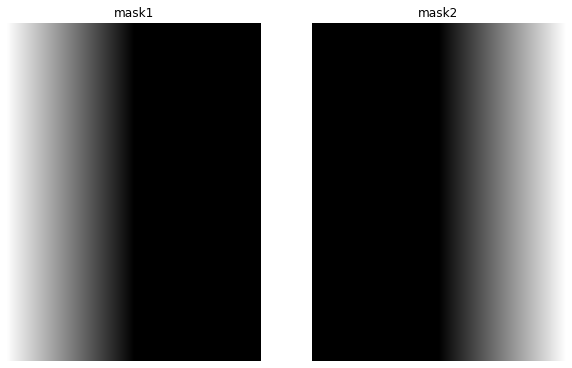

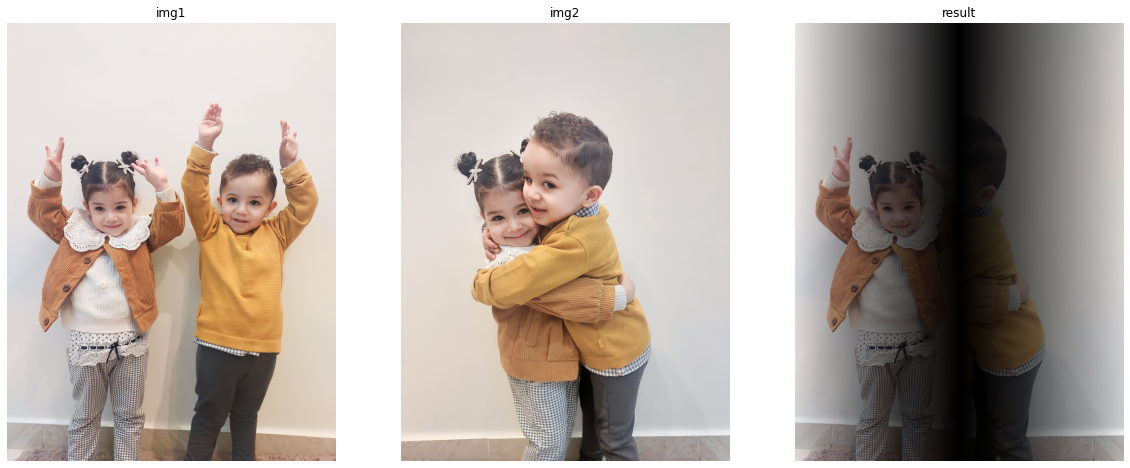

In [12]:
# read the two color images 
img1=cv2.imread("img11.jpg",1)
img2=cv2.imread("img22.jpg",1)



# resize two image to some size 
img1=cv2.resize(img1,dsize=(3534,4712))
img2=cv2.resize(img2,dsize=(3534,4712))


# generate masks 
img1_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

mask1=np.zeros_like(img1_gray,dtype=img1_gray.dtype)
mask1[:,0:int(img1_gray.shape[1]*.50)]=255

mask2=cv2.flip(mask1,flipCode=1)

mask1=cv2.distanceTransform(mask1,distanceType=cv2.DIST_L1,maskSize=cv2.DIST_MASK_3)
mask2=cv2.distanceTransform(mask2,distanceType=cv2.DIST_L1,maskSize=cv2.DIST_MASK_3)
mask1=cv2.cvtColor(mask1,cv2.COLOR_GRAY2RGB)
mask2=cv2.cvtColor(mask2,cv2.COLOR_GRAY2RGB)




mask1 = mask1 / mask1.max()
mask2 = mask2 / mask2.max()
print(mask1.dtype, mask1.min(), mask1.max())
print(mask2.dtype, mask2.min(), mask2.max())
plt.subplots(1,2,figsize=(10, 10))

plt.subplot(1,2,1)
plt.imshow(mask1)
plt.axis('off')
plt.title('mask1')

plt.subplot(1,2,2)
plt.imshow(mask2)
plt.axis('off')
plt.title('mask2')

# add images 
result=cv2.convertScaleAbs(mask1*img1+mask2*img2)

#G_max = np.max(img1).item()
#G_min = np.min(img1).item()
#
#O_max = np.max(result).item()
#O_min = np.min(result).item()
#
#result = (G_max-G_min)/(O_max-O_min)*(result.copy().astype('float')-O_min) + G_min
result = result.astype('uint8')

# display images
plt.subplots(1,3,figsize=(20, 20))

plt.subplot(1,3,1)
plt.imshow(img1)
plt.axis('off')
plt.title('img1')

plt.subplot(1,3,2)
plt.imshow(img2)
plt.axis('off')
plt.title('img2')

plt.subplot(1,3,3)
plt.imshow(result,vmin=0,vmax=255)
plt.axis('off')
plt.title('result')